In [10]:
import sys
sys.path.append('..')

from dataset import ModisDataset
import pandas as pd
import geopandas as gpd
#!pip install contextily
import contextily as ctx
import matplotlib.pyplot as plt
import os
import torch
from model import Model, restore
import numpy as np
from visualizations import make_and_plot_predictions, make_and_plot_combined_predictions

tumblack = "#000000"
tumblue = "#0065bd"
tumorange = "#e37222"
tumbluelight = "#64a0c8"
tumgray = "#999999"
tumlightgray = "#dad7cb"
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [17]:
num_layers = 3
hidden_size = 32
region = "germany"
epoch = 10
model_name = f"LSTM_{region}_l={num_layers}_h={hidden_size}_e={epoch}.pth"
model_dir="/data2/igarss2020/models/"

model_path=os.path.join(model_dir,model_name)
device = torch.device('cuda')

dataset = ModisDataset(region=region,
                            fold="test",
                            znormalize=True,
                            augment=False,
                            include_time=False,
                            smooth=None)

trainset = ModisDataset(region=region,
                            fold="train",
                            znormalize=True,
                            augment=False,
                            include_time=False,
                            smooth=None)

model = Model(input_size=1,
              hidden_size=hidden_size,
              num_layers=num_layers,
              output_size=1,
              device=device)

print(model_path)
restore(model_path,model)

local dataset found at /tmp/germany.csv
loading cached dataset found at /tmp/germany.npz
local dataset found at /tmp/germany.csv
loading cached dataset found at /tmp/germany.npz
/data2/igarss2020/models/LSTM_germany_l=3_h=32_e=10.pth


1
saving to /home/marc/projects/igarss2020_tex/img/prior/prior1


(<Figure size 1008x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efe080e55c0>,
       dtype=object))

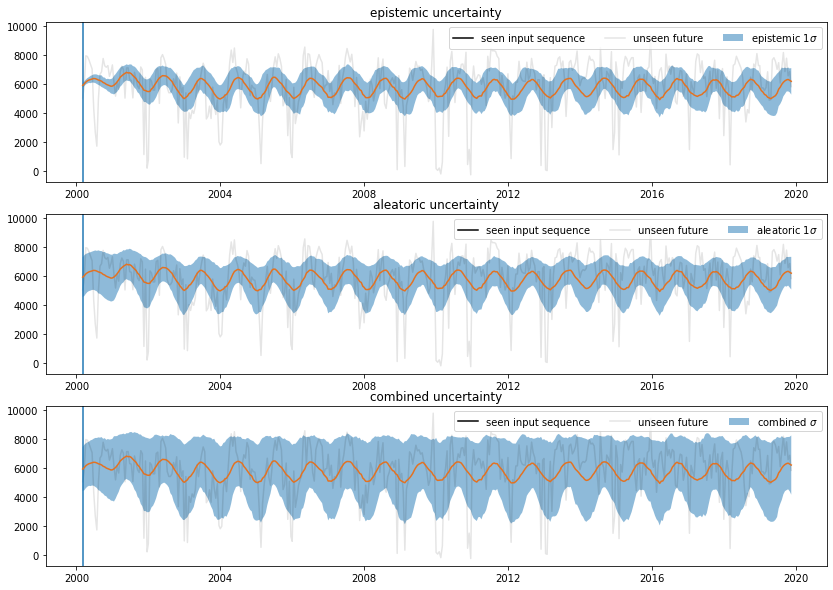

In [64]:
idx = 1
print(idx)
N_seen_points = 1
N_predictions=100

store = "/home/marc/projects/igarss2020_tex/img/prior/prior1"

x = dataset.data[idx].astype(float)
date = dataset.date[idx].astype(np.datetime64)
make_and_plot_predictions(model, x, date, N_seen_points=N_seen_points, N_predictions=N_predictions,
                          device=device, meanstd=(dataset.mean,dataset.std), store=store)

15
saving to /home/marc/projects/igarss2020_tex/img/prior/prior_seasonal


(<Figure size 1008x720 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7efddd04bda0>,
       dtype=object))

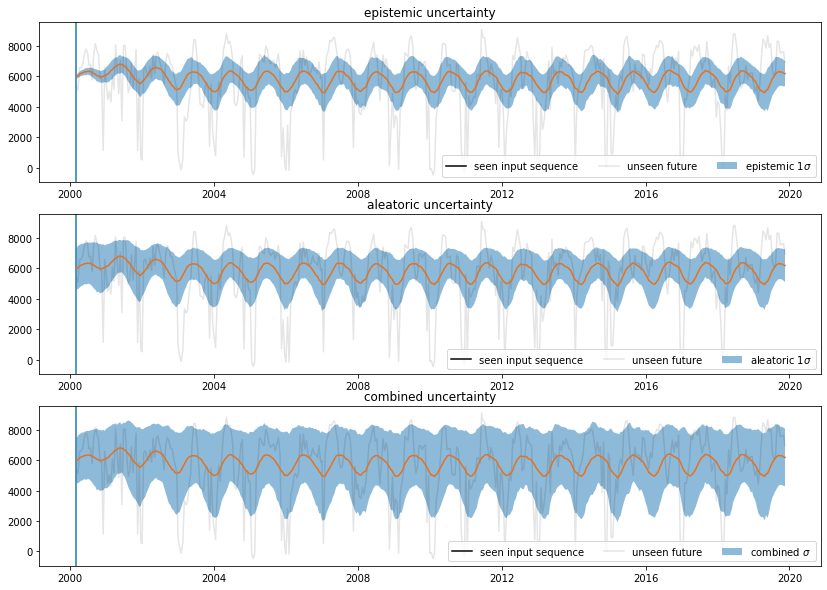

In [95]:
torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = True
np.random.seed(0)

idx = 15
print(idx)
N_seen_points = 1
N_predictions=100

store = "/home/marc/projects/igarss2020_tex/img/prior/prior_seasonal"
x = dataset.data[idx].astype(float)
date = dataset.date[idx].astype(np.datetime64)
make_and_plot_predictions(model, x, date, N_seen_points=N_seen_points, N_predictions=N_predictions,
                          device=device, meanstd=(dataset.mean,dataset.std), store=store)

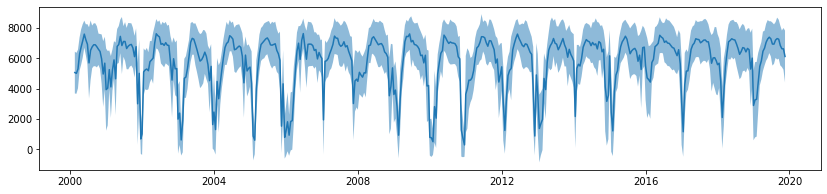

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(14, 3))

mean = trainset.data.mean(0)[:,0]
std = trainset.data.std(0)[:,0]
date = trainset.date[0].astype(np.datetime64)

dmean = trainset.mean
dstd = trainset.std
x = (x * dstd) + dmean
mean = (mean * dstd) + dmean
data_std = std * dstd

ax.fill_between(date, mean + data_std, mean - data_std, alpha=.5,label=r"combined $\sigma$")
ax.plot(date,mean)

df = pd.DataFrame([date,mean,data_std],index=["date","mean","std"]).T
df["mean-std"] = df["mean"] - df["std"]
df["mean+std"] = df["mean"] + df["std"]
df.to_csv("/home/marc/projects/igarss2020_tex/img/prior/trainset.csv")
#plt.plot(trainmean)

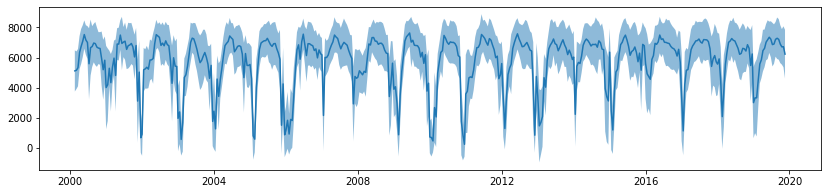

In [108]:
fig, ax = plt.subplots(1, 1, figsize=(14, 3))

mean = dataset.data.mean(0)[:,0]
std = dataset.data.std(0)[:,0]
date = dataset.date[0].astype(np.datetime64)

dmean = dataset.mean
dstd = dataset.std
x = (x * dstd) + dmean
mean = (mean * dstd) + dmean
data_std = std * dstd

ax.fill_between(date, mean + data_std, mean - data_std, alpha=.5,label=r"combined $\sigma$")
ax.plot(date,mean)

df = pd.DataFrame([date,mean,data_std],index=["date","mean","std"]).T
df["mean-std"] = df["mean"] - df["std"]
df["mean+std"] = df["mean"] + df["std"]
df.to_csv("/home/marc/projects/igarss2020_tex/img/prior/testset.csv")

In [106]:
df

,date,mean,std,mean-std,mean+std
0,2000-02-18,5113.05,1365.97,3747.07,6479.02
1,2000-03-05,5152.35,1251.58,3900.77,6403.93
2,2000-03-21,5325.59,1237,4088.59,6562.59
3,2000-04-06,6331.51,1094.38,5237.12,7425.89
4,2000-04-22,6735.57,1163.43,5572.14,7899.01
...,...,...,...,...,...
450,2019-09-14,7203.15,1346.05,5857.1,8549.2
451,2019-09-30,6886.71,1258.09,5628.62,8144.8
452,2019-10-16,6706.88,1177.84,5529.04,7884.72
453,2019-11-01,6715.19,1356.48,5358.71,8071.66
